# Milestone Project 1: Food Vision Big

## Check GPU

* A100![2024-01-31 (1).png](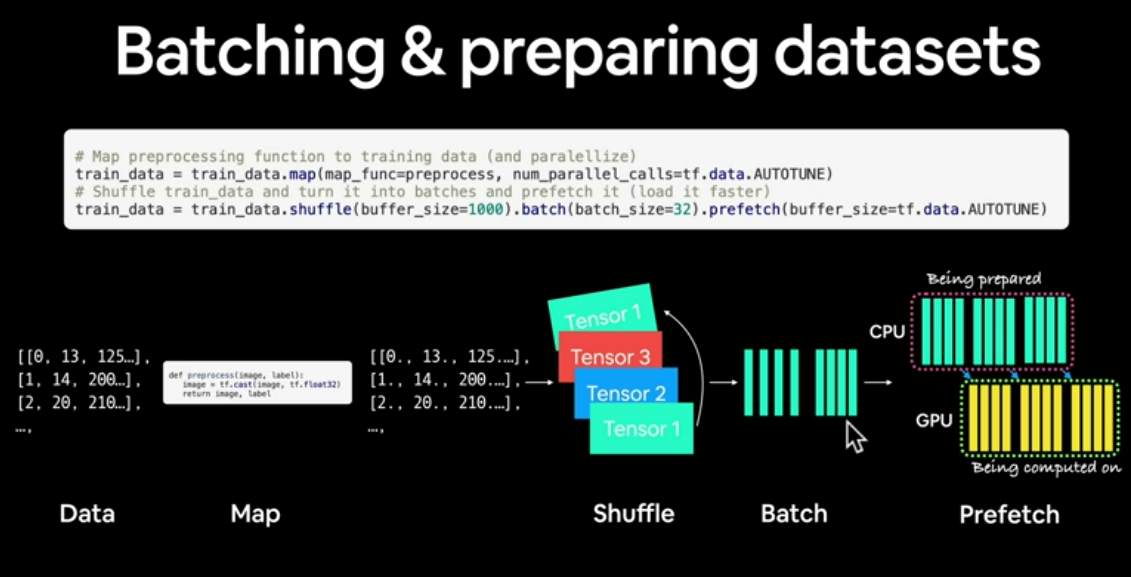![2024-01-31 (1).png](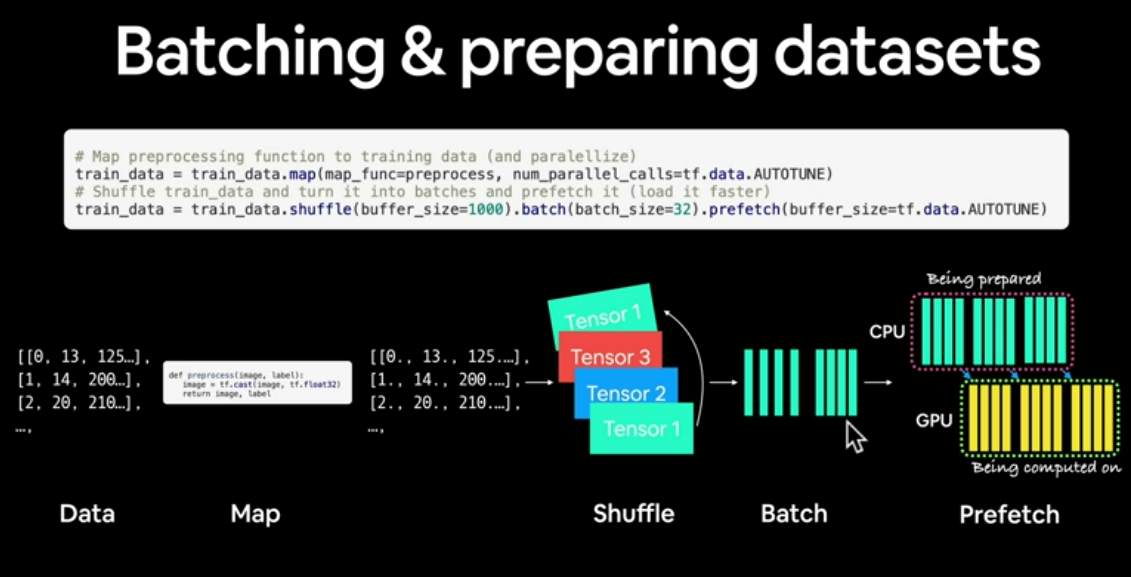![2024-01-31 (3).png](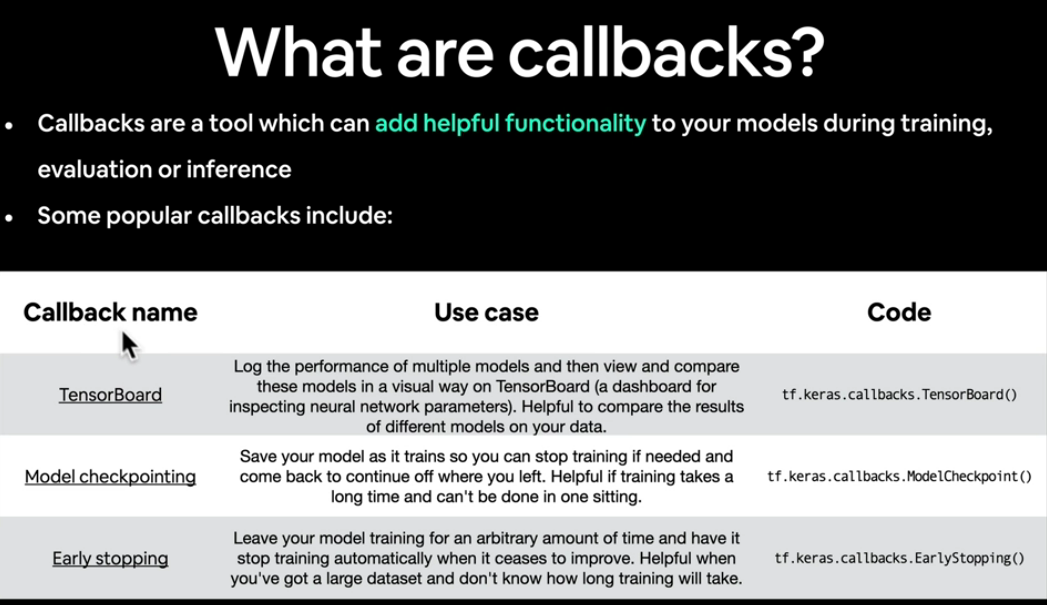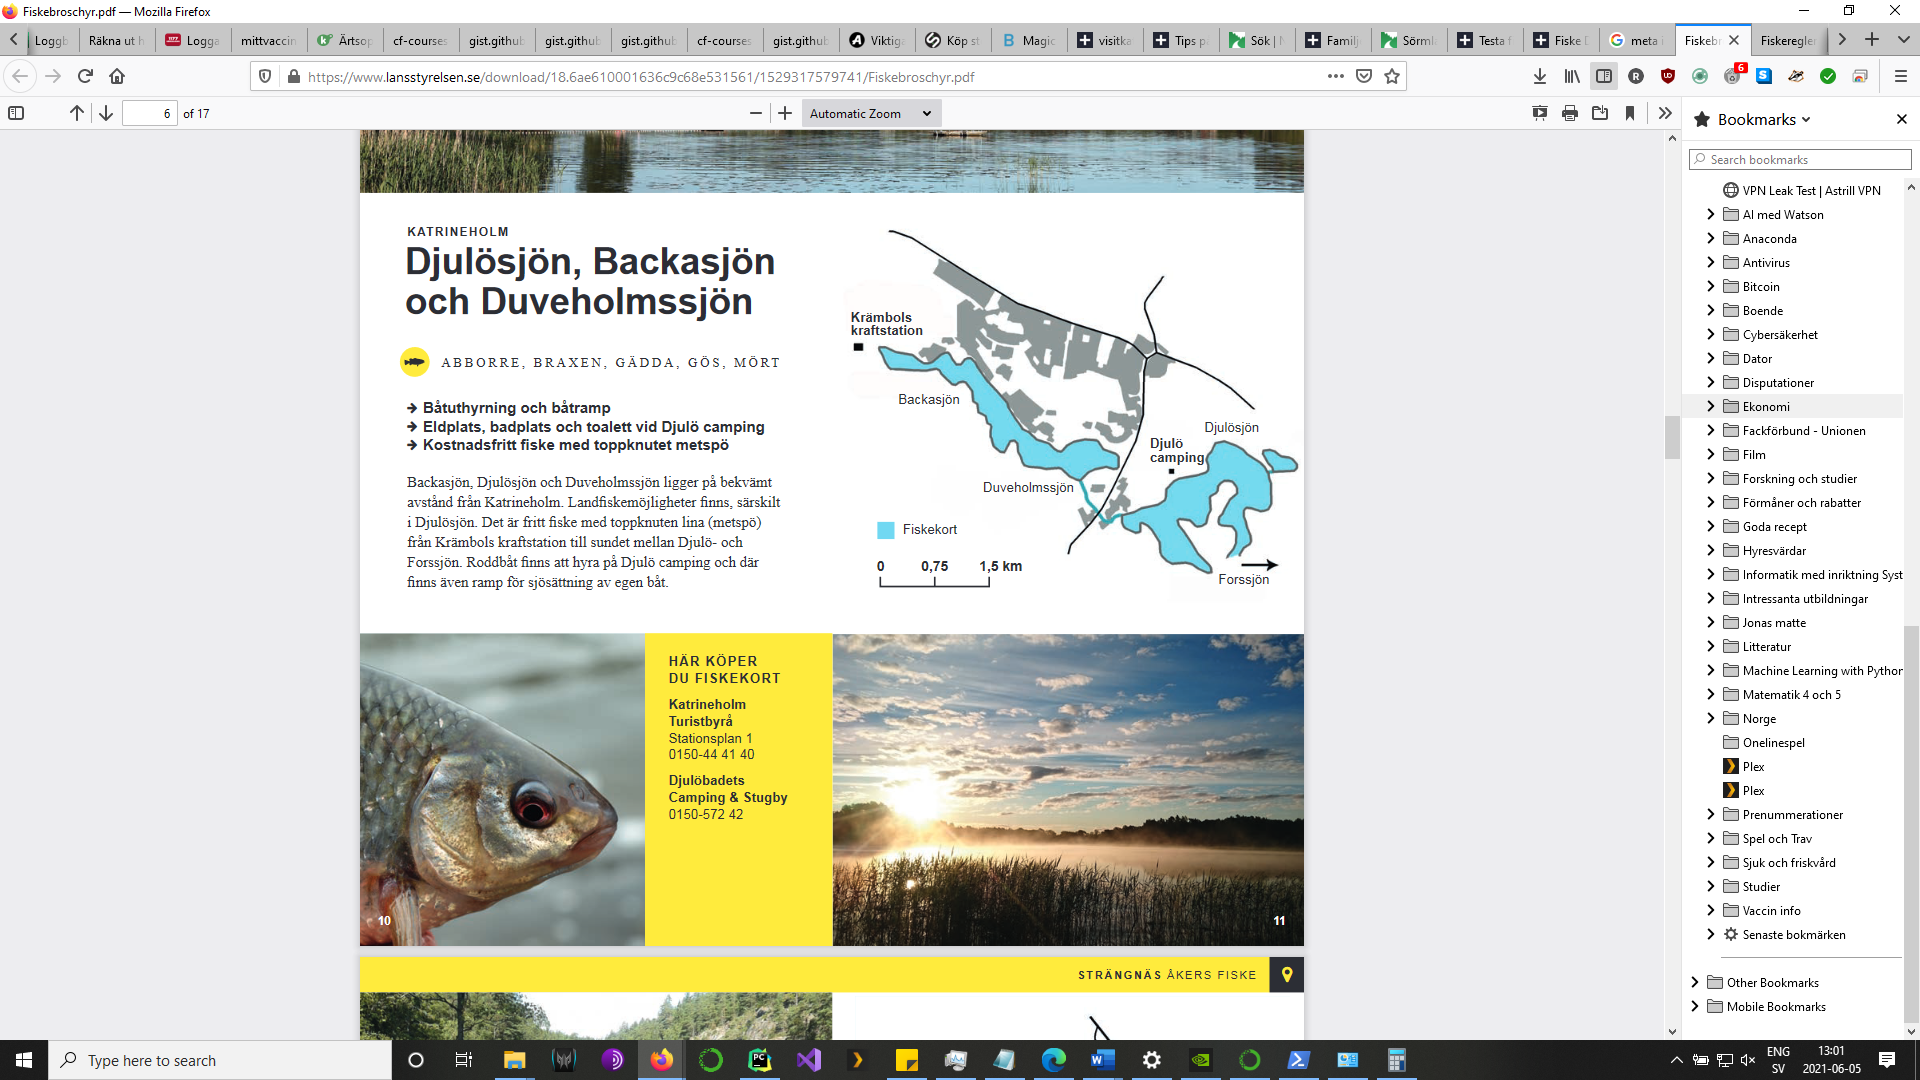)))
* T4
* V100


In [1]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-523fe207-476b-06a9-6a29-637916773d19)


In [2]:
# Get helper functions (Download helper functions script from JonasHagstrom79/Tensorflow(raw))
!wget https://raw.githubusercontent.com/JonasHagstrom79/Tensorflow/main/helper.py



--2024-02-03 16:27:10--  https://raw.githubusercontent.com/JonasHagstrom79/Tensorflow/main/helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13380 (13K) [text/plain]
Saving to: ‘helper.py’

helper.py           100%[===================>]  13.07K  --.-KB/s    in 0s      

2024-02-03 16:27:10 (154 MB/s) - ‘helper.py’ saved [13380/13380]



In [3]:
# Import series of helper functions
from helper import create_tensorboard_callback, plot_loss_curves, compare_historys

## Use TensorFlow datasets to download data

If you want to get an overwiev of TensorFlow Datasets (TFDS), read the [guide](https://www.tensorflow.org/datasets/overview)

In [4]:
# Get TensorFllow Datasets
import tensorflow_datasets as tfds
datasets_list = tfds.list_builders() # Get all available datasets in TFDS
print('food101' in datasets_list)

True


In [5]:
# Load in the food101 (takes 5-6 minutes)
(train_data, test_data), ds_info = tfds.load(name='food101',
                                             split=['train', 'validation'],
                                                    shuffle_files=True,
                                                    as_supervised=True, # Data gets returned in tuple format (data, label)
                                                    with_info=True) # Downloads the metadata aswell (ds_info makes it possible)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/75750 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/food101/2.0.0.incompleteRXS5F4/food101-train.tfrecord*...:   0%|          …

Generating validation examples...:   0%|          | 0/25250 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/food101/2.0.0.incompleteRXS5F4/food101-validation.tfrecord*...:   0%|     …

Dataset food101 downloaded and prepared to /root/tensorflow_datasets/food101/2.0.0. Subsequent calls will reuse this data.


## Exploring the Food101 data from TensorFlow Datasets

To become one with our data, we want to find:
* Class names
* The shape of our input data (image tensors)
* The datatype of our inut data
* What the labels look like (e.g are they one-hot encoded or are they label encoded)
* Do the labels match p with the class names?

In [6]:
# Fetures of Food101 from TFDS
ds_info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=uint8),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=101),
})

In [7]:
# Get the class names
class_names = ds_info.features["label"].names
class_names[:10]

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito']

In [8]:
# Take one sample of the training data
train_one_sample = train_data.take(1) # Samples are in format (image_tensor, label)
train_one_sample

<_TakeDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [9]:
# Output info about our trainig sample
for image, label in train_one_sample:
  print(f"""
  Image shape: {image.shape}
  Image datatype: {image.dtype}
  Target class from food101 (tensor form): {label}
  Class name (str form): {class_names[label.numpy()]}
  """)


  Image shape: (384, 512, 3)
  Image datatype: <dtype: 'uint8'>
  Target class from food101 (tensor form): 97
  Class name (str form): takoyaki
  


In [10]:
# What does our image tensor from TFDS's Food101 loo like?
image

<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[ 54,  30,  26],
        [ 57,  33,  29],
        [ 72,  49,  43],
        ...,
        [192, 184, 163],
        [190, 179, 159],
        [181, 169, 147]],

       [[ 51,  28,  22],
        [ 60,  37,  31],
        [ 81,  58,  52],
        ...,
        [191, 183, 162],
        [189, 176, 157],
        [176, 164, 142]],

       [[ 78,  58,  49],
        [ 96,  76,  67],
        [122, 102,  93],
        ...,
        [191, 183, 162],
        [188, 175, 156],
        [172, 157, 136]],

       ...,

       [[162, 140, 117],
        [164, 142, 119],
        [169, 147, 126],
        ...,
        [  5,   5,   5],
        [  6,   6,   6],
        [  6,   6,   6]],

       [[168, 146, 123],
        [170, 148, 125],
        [176, 154, 131],
        ...,
        [  5,   5,   5],
        [  6,   6,   6],
        [  6,   6,   6]],

       [[173, 151, 128],
        [176, 154, 131],
        [182, 160, 137],
        ...,
        [  4,   4,   

In [11]:
# What are the min and max values of our image tensor?
import tensorflow as tf
tf.reduce_min(image), tf.reduce_max(image)

(<tf.Tensor: shape=(), dtype=uint8, numpy=0>,
 <tf.Tensor: shape=(), dtype=uint8, numpy=255>)

### Plot an image from TensorFlow datasets

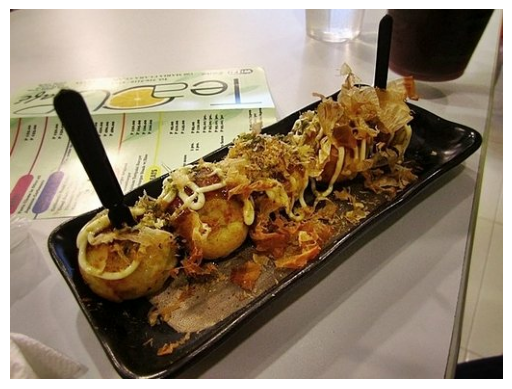

In [12]:
# Plot an image tensor
import matplotlib.pyplot as plt
# Convert the TensorFlow image tensor to NumPy array
image_np = image.numpy()
# Display the image using Matplotlib
plt.imshow(image_np)
plt.axis('off') # Optional: Turn off axis labels
plt.show()

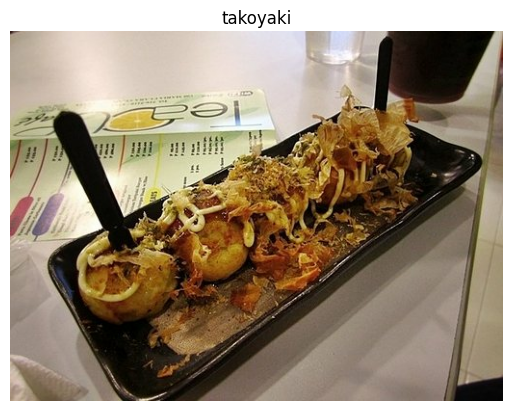

In [13]:
plt.imshow(image)
plt.title(class_names[label.numpy()]) # Add title to image to verify the label is assosciated with the right image
plt.axis(False);

## Create preprocessing functions for our data

Neural networks perform best when data is in a certain way (e.g. batched, normalized, etc).

However, not all data (including data from TensorFlow Datasets) comes like this.

So in order to get it ready for a neural network, you'll often have to write preprocessing functions and map it to your data.

What we know about our data:
* In `uint8` datatype
* Comprised of all different size tensors (different sized images)
* Not scaled (the pixel values are between 0 & 255)

What we know models like:
* Data in `float32` dtype (or for mixed precision `float16` and `float32`)
* For batches, TensorFlow likes all of the tensors within a batch to be of the same size
* Scaled (values between 0 & 1) also called normalized tensors generally perform better

With thes points in mind, we've got a few things we can tackle with a preprocessing function.

In [14]:
# Make a function for preprocessing images
def preprocess_img(image, label, img_shape=224): # Since its a tuple we need image, label
  """
  Converts image datatype from 'uint8' -> 'float32' and reshapes
  image to [img_shape, img_shape, colour_channels]
  """
  image = tf.image.resize(image, [img_shape, img_shape]) #reshape target image
  #image = image /255.0 # Rescale image to the range [0, 1] Dont need to do this when using REsNet as it does for you
  return tf.cast(image, tf.float32), label # return (float32_image, label) tuple


In [15]:
# Preprocess a single sampple image and check the outputs
preprocessed_img = preprocess_img(image, label)[0] # [0] for the 0th index of the tuple we're returning
print(f"Image before preprocessing:\n {image[:2]}..., \nShape: {image.shape},\nDatatype: {image.dtype}\n")
print(f"Image after preprocessing:\n{preprocessed_img[:2]}...,\nShape: {preprocessed_img.shape}, \nDatatype: {preprocessed_img.dtype}")

Image before preprocessing:
 [[[ 54  30  26]
  [ 57  33  29]
  [ 72  49  43]
  ...
  [192 184 163]
  [190 179 159]
  [181 169 147]]

 [[ 51  28  22]
  [ 60  37  31]
  [ 81  58  52]
  ...
  [191 183 162]
  [189 176 157]
  [176 164 142]]]..., 
Shape: (384, 512, 3),
Datatype: <dtype: 'uint8'>

Image after preprocessing:
[[[ 56.23469   32.591835  27.877552]
  [ 98.16328   75.16328   68.50001 ]
  [121.62245  101.62245   91.63265 ]
  ...
  [191.72456  191.36736  170.93883 ]
  [202.18863  196.9743   176.90286 ]
  [185.918    174.10167  153.6169  ]]

 [[ 93.47959   73.55102   64.19388 ]
  [144.57143  124.64286  113.561226]
  [169.66327  150.20409  138.79082 ]
  ...
  [196.22955  195.22955  176.80103 ]
  [202.02025  194.9335   175.87225 ]
  [182.24942  168.44324  148.72888 ]]]...,
Shape: (224, 224, 3), 
Datatype: <dtype: 'float32'>


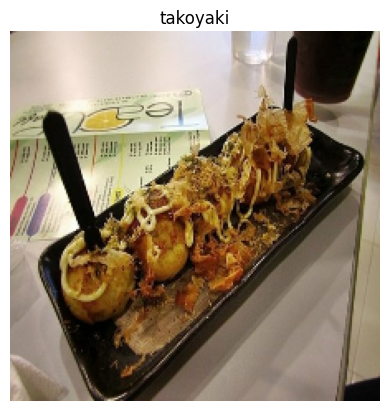

In [16]:
# We can still plot our preprocessed image as long as we
# divide by 255 (for matplotlib capatibility)
plt.imshow(preprocessed_img/255.)
plt.title(class_names[label])
plt.axis(False);

## Batch & prepare datasets

We're now going to make our data input pipeline run really fast.

More [resources](https://www.tensorflow.org/guide/data_performance) on this.

![2024-01-31 (1).png](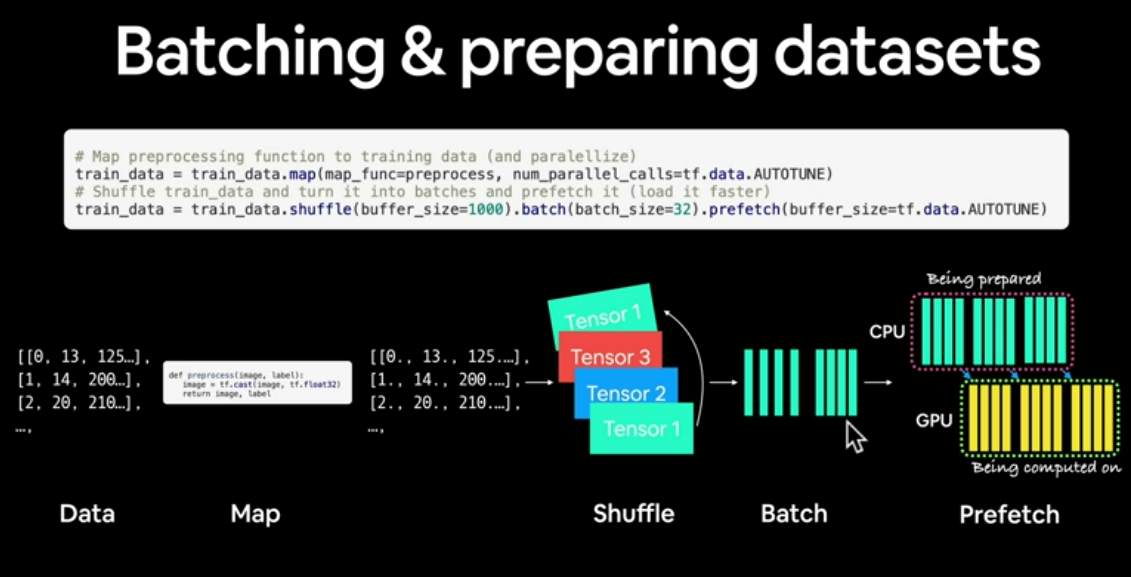![2024-02-03 (3).png](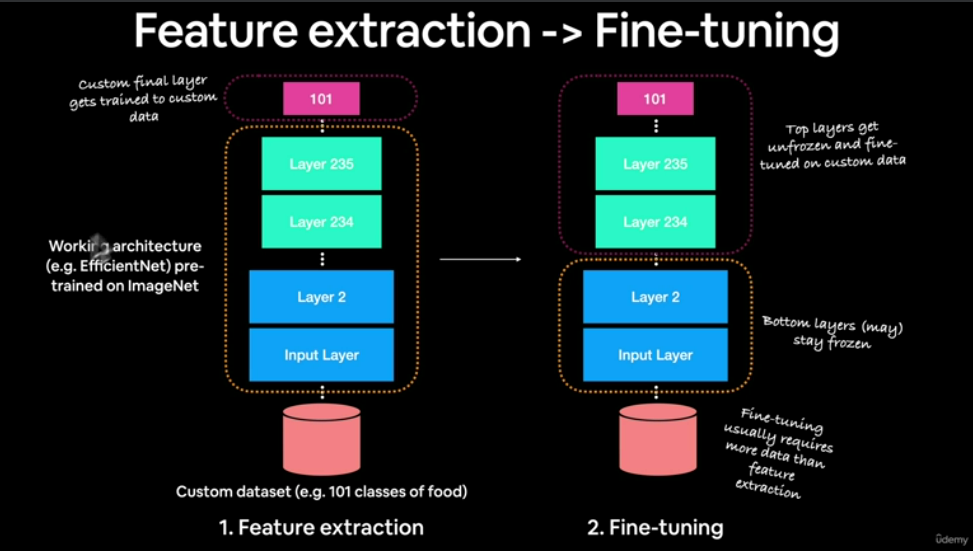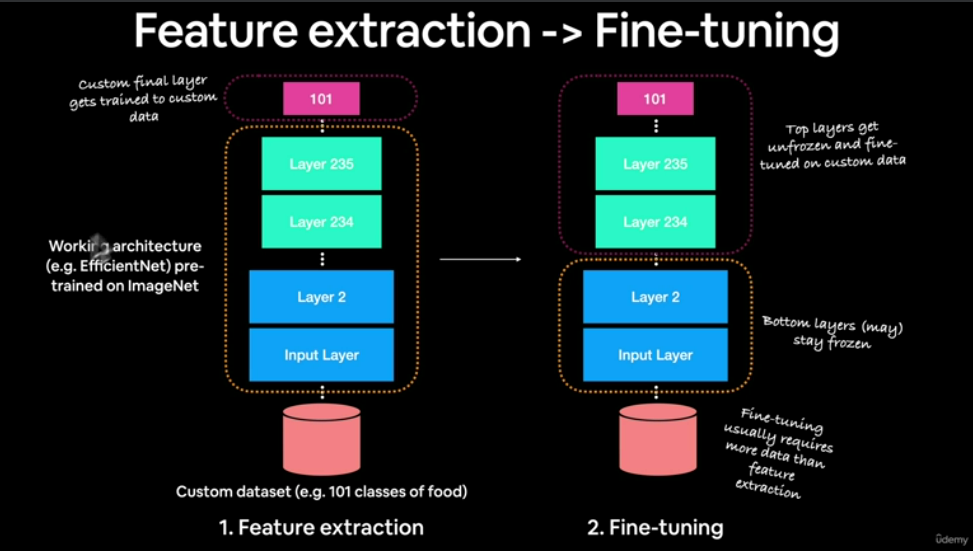))

In [17]:
# Map preprocessing function to training (and parallelize)
train_data = train_data.map(map_func=preprocess_img, num_parallel_calls=tf.data.AUTOTUNE) # Autotune uses two chips, faster
# Shuffle train data and turn into batches and prefetch it (load faster)
train_data = train_data.shuffle(buffer_size=1000).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE) # Shuffle is how many elements to shuffle at a single time (1000 if memory not enough)

# Map preprocessing function to test data
test_data = test_data.map(map_func=preprocess_img, num_parallel_calls=tf.data.AUTOTUNE)# .batch(32).prefetch(tf.data.AUTOTUNE).cache()
# Turn test data into batches (don't need to shuffle)
test_data = test_data.batch(32).prefetch(tf.data.AUTOTUNE)


In [18]:
train_data, test_data

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>)

## Create modelling callbacks

We're going to create a coupe of callbacks to help us while our model trains:
* `TensorBoard` callbacks to log training results (so we can visualize them later if need be)
* `ModelCheckpoint` callback to save our model's progress after feature extraction

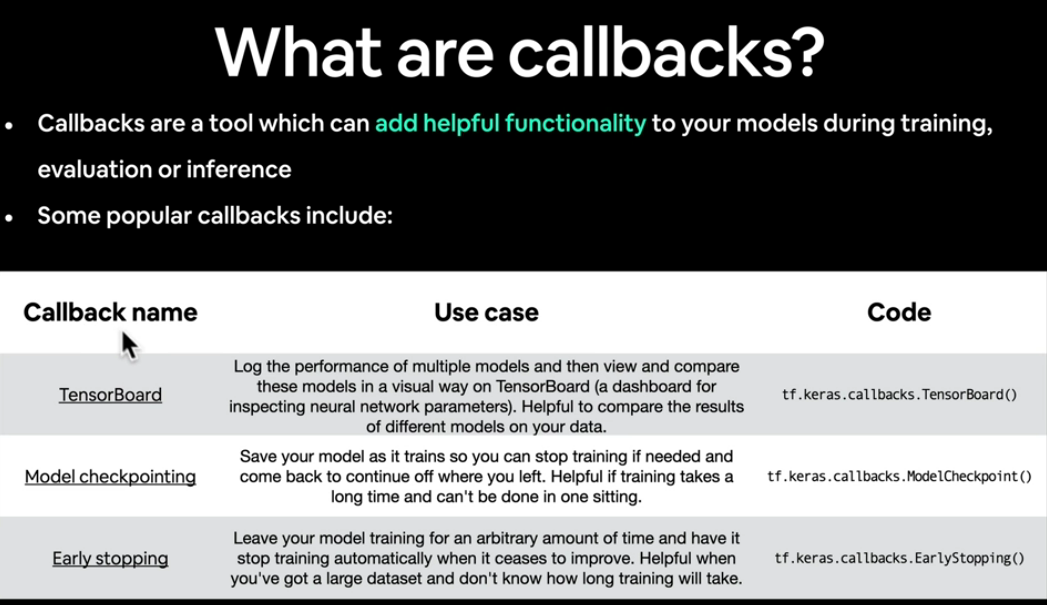

In [19]:
# Create tensorbord callback (import from helper.py)
from helper import create_tensorboard_callback

# Create a ModelCheckpoit callback to save a model's progress during training
checkpoint_path = "model_checkpoints/checkPoint.ckpt" # saving weights requires ".ckpt" extension
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      monitor="val_accuracy", # save the model weights with best validation acc
                                                      save_best_only=True, # only save the best weights
                                                      save_weights_only=True, # only save model weights (not whole model)
                                                      verbose=0) # Outputs information, 0=none, 1=little info, 2=most info

## Setup mixed precision training

For deeper undestanding, [TensorFlow Guide](https://www.tensorflow.org/guide/mixed_precision)

Mixed precision utilizes a combination of `float32` and `float16` data types to speed up model performance.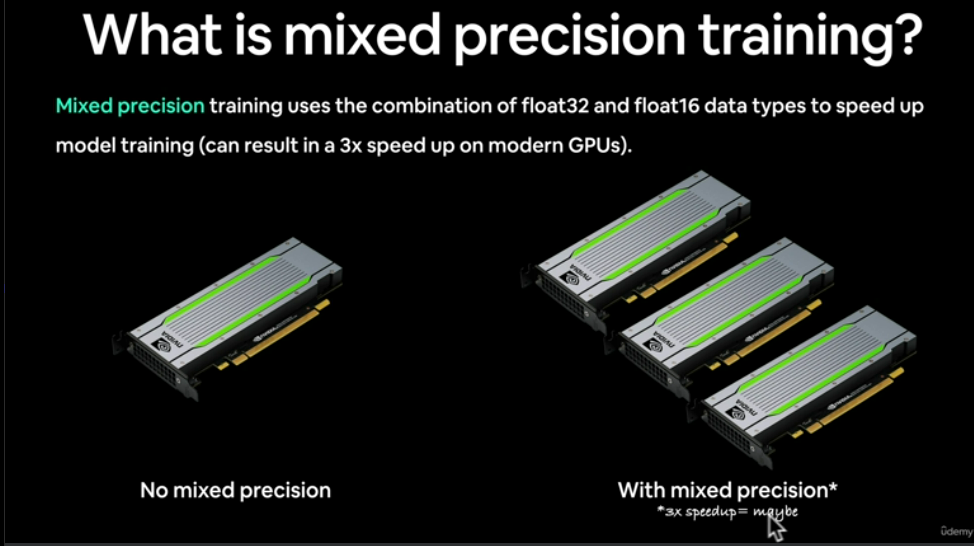

In [20]:
# Turn on mixed precision training
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy(policy='mixed_float16') # Set global data polict to mixed percision
mixed_precision

<module 'keras.api._v2.keras.mixed_precision' from '/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/mixed_precision/__init__.py'>

In [21]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-523fe207-476b-06a9-6a29-637916773d19)


## Build feature extraction model

In [30]:
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# Create base model
input_shape = (224, 224, 3)
base_model = tf.keras.applications.EfficientNetB7(include_top=False) # Downloads the pretrained weights
base_model.trainable = False # Froze the layers

# Create functional model
inputs = layers.Input(shape=input_shape, name="input_layer")
# Note: EfficienetNetBX models have rescaling built-in if your model doesn't you can have a layer like below
# x = preprocessing.rescaling(1./255)(x)
x = base_model(inputs, training=False) # Makes sure layers wich should be in inference mode only stay like that
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(len(class_names))(x)
outputs = layers.Activation("softmax", dtype=tf.float32, name="softmax_float32")(x)
model = tf.keras.Model(inputs, outputs)

# Compile the model
model.compile(loss="sparse_categorical_crossentropy", # Use spares_categorical_crossentropy when labels
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

258076736/258076736 [==============================] - 12s 0us/step


In [31]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb7 (Functional  (None, None, None, 2560   64097687  
 )                           )                                   
                                                                 
 global_average_pooling2d_1  (None, 2560)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_1 (Dense)             (None, 101)               258661    
                                                                 
 softmax_float32 (Activatio  (None, 101)               0         
 n)                                                              
                                                           

## Checking layer dtype policies (are we using mixed precision?)

In [32]:
# Check the dtype_policy attributes of layers in our model
for layer in model.layers:
    print(layer.name, layer.dtype, layer.trainable, layer.dtype_policy)

input_layer float32 True <Policy "float32">
efficientnetb7 float32 False <Policy "mixed_float16">
global_average_pooling2d_1 float32 True <Policy "mixed_float16">
dense_1 float32 True <Policy "mixed_float16">
softmax_float32 float32 True <Policy "float32">


Going through the above we see:
* `layer.name`: the human readable name of particular layer
* `layer.trainable`: is the layer trainable or not? (If `False`, the weights are frozen)
* `layer.dtype`: the data type a layer stores its variables in
* `layer.dtype_policy`: the data type policy a layer computes on its variables with

In [33]:
# Check the dtype_policy attributes of layers in the base model
for layer in model.layers[1].layers: # Check the layers of the base model (layer at index 1 of `model`)
  print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

input_2 False float32 <Policy "float32">
rescaling_2 False float32 <Policy "mixed_float16">
normalization_1 False float32 <Policy "mixed_float16">
rescaling_3 False float32 <Policy "mixed_float16">
stem_conv_pad False float32 <Policy "mixed_float16">
stem_conv False float32 <Policy "mixed_float16">
stem_bn False float32 <Policy "mixed_float16">
stem_activation False float32 <Policy "mixed_float16">
block1a_dwconv False float32 <Policy "mixed_float16">
block1a_bn False float32 <Policy "mixed_float16">
block1a_activation False float32 <Policy "mixed_float16">
block1a_se_squeeze False float32 <Policy "mixed_float16">
block1a_se_reshape False float32 <Policy "mixed_float16">
block1a_se_reduce False float32 <Policy "mixed_float16">
block1a_se_expand False float32 <Policy "mixed_float16">
block1a_se_excite False float32 <Policy "mixed_float16">
block1a_project_conv False float32 <Policy "mixed_float16">
block1a_project_bn False float32 <Policy "mixed_float16">
block1b_dwconv False float32 <P

In [34]:
mixed_precision.global_policy()

<Policy "mixed_float16">

## Fit the feature extraction model

If pur goal is to fine-tune a pretrained model, the general order of doing things is:
1. Build a feature extraction model (train a couple output layers with base layer frozen)
2. Fine-tune som of the frozen layers

In [35]:
# Turn off all warnings except for errors
tf.get_logger().setLevel('ERROR')

# Fit the feature extraction model with callbacks
history_101_food_classes_feature_extract = model.fit(train_data,
                                                     epochs=3,
                                                     steps_per_epoch=(len(train_data)),
                                                     validation_data=test_data,
                                                     validation_steps=int(0.15 * len(test_data)),
                                                     callbacks=[create_tensorboard_callback(dir_name="training_logs",
                                                                                            experiment_name="efficientnetB7_101_classes_all_data_feature_extract"),
                                                                                            model_checkpoint])

Saving TensorBoard log files to: training_logs/efficientnetB0_101_classes_all_data_feature_extract/20240203-171341
Epoch 1/3
2368/2368 [==============================] - 503s 203ms/step - loss: 1.7940 - accuracy: 0.5529 - val_loss: 1.2498 - val_accuracy: 0.6687
Epoch 2/3
2368/2368 [==============================] - 473s 199ms/step - loss: 1.3182 - accuracy: 0.6574 - val_loss: 1.1540 - val_accuracy: 0.6886
Epoch 3/3
2368/2368 [==============================] - 473s 200ms/step - loss: 1.1619 - accuracy: 0.6929 - val_loss: 1.1205 - val_accuracy: 0.6986


In [36]:
result_feature_extract_model = model.evaluate(test_data)
result_feature_extract_model

790/790 [==============================] - 148s 187ms/step - loss: 1.1317 - accuracy: 0.6968


[1.1316909790039062, 0.6967524886131287]


### TODO: Fit the feature extraction model

Now that's one good looking model. Let's fit it to our data shall we?

Three epochs should be enough for our top layers to adjust their weights enough to our food image data.

To save time per epoch, we'll also only validate on 15% of the test data.


In [29]:
#219 3:34

In [ ]:
# Fit the feature extraction model for 3 epochs with tensorboard and model checkpoint callbacks
# Turn off all warnings except for errors
tf.get_logger().setLevel('ERROR')

# Fit the feature extraction model with callbacks
history_101_food_classes_feature_extract = model.fit(train_data,
                                                     epochs=3,
                                                     steps_per_epoch=(len(train_data)),
                                                     validation_data=test_data,
                                                     validation_steps=int(0.15 * len(test_data)),
                                                     callbacks=[create_tensorboard_callback(dir_name="training_logs",
                                                                                            experiment_name="efficientnetB0_101_classes_all_data_feature_extract"),
                                                                                            model_checkpoint])

Nice, looks like our feature extraction model is performing pretty well. How about we evaluate it on the whole test dataset?

In [ ]:
# Evaluate model (unsaved version) on whole test dataset
result_feature_extract_model = model.evaluate(test_data)
result_feature_extract_model

### TODO: Save the whole model to file

In [38]:
# Save model locally (if you're using Google Colab, your saved model will Colab instance terminates)
model.save("EfficientNetB7_Food_101.hdf5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [40]:
from tensorflow.keras.models import load_model

# Load model previously saved above
loaded_model = load_model("EfficientNetB7_Food_101.hdf5")

In [41]:
# Check the layers in the base model and see what dtype policy they're using
for layer in model.layers[1].layers: # Check the layers of the base model (layer at index 1 of `model`)
  print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

input_2 False float32 <Policy "float32">
rescaling_2 False float32 <Policy "mixed_float16">
normalization_1 False float32 <Policy "mixed_float16">
rescaling_3 False float32 <Policy "mixed_float16">
stem_conv_pad False float32 <Policy "mixed_float16">
stem_conv False float32 <Policy "mixed_float16">
stem_bn False float32 <Policy "mixed_float16">
stem_activation False float32 <Policy "mixed_float16">
block1a_dwconv False float32 <Policy "mixed_float16">
block1a_bn False float32 <Policy "mixed_float16">
block1a_activation False float32 <Policy "mixed_float16">
block1a_se_squeeze False float32 <Policy "mixed_float16">
block1a_se_reshape False float32 <Policy "mixed_float16">
block1a_se_reduce False float32 <Policy "mixed_float16">
block1a_se_expand False float32 <Policy "mixed_float16">
block1a_se_excite False float32 <Policy "mixed_float16">
block1a_project_conv False float32 <Policy "mixed_float16">
block1a_project_bn False float32 <Policy "mixed_float16">
block1b_dwconv False float32 <P

In [42]:
# Check the layers in the loaded_model and see what dtype policy they're using
for layer in loaded_model.layers[1].layers: # Check the layers of the base model (layer at index 1 of `model`)
  print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

input_2 True float32 <Policy "float32">
rescaling_2 False float32 <Policy "mixed_float16">
normalization_1 False float32 <Policy "mixed_float16">
rescaling_3 False float32 <Policy "mixed_float16">
stem_conv_pad False float32 <Policy "mixed_float16">
stem_conv False float32 <Policy "mixed_float16">
stem_bn False float32 <Policy "mixed_float16">
stem_activation False float32 <Policy "mixed_float16">
block1a_dwconv False float32 <Policy "mixed_float16">
block1a_bn False float32 <Policy "mixed_float16">
block1a_activation False float32 <Policy "mixed_float16">
block1a_se_squeeze False float32 <Policy "mixed_float16">
block1a_se_reshape False float32 <Policy "mixed_float16">
block1a_se_reduce False float32 <Policy "mixed_float16">
block1a_se_expand False float32 <Policy "mixed_float16">
block1a_se_excite False float32 <Policy "mixed_float16">
block1a_project_conv False float32 <Policy "mixed_float16">
block1a_project_bn False float32 <Policy "mixed_float16">
block1b_dwconv False float32 <Po

In [43]:
# Check loaded model performance (this should be the same as results_feature_extract_model)

# Turn off all warnings except for errors
tf.get_logger().setLevel('ERROR')

# Fit the feature extraction model with callbacks
history_101_food_classes_feature_extract = loaded_model.fit(train_data,
                                                     epochs=3,
                                                     steps_per_epoch=(len(train_data)),
                                                     validation_data=test_data,
                                                     validation_steps=int(0.15 * len(test_data)),
                                                     callbacks=[create_tensorboard_callback(dir_name="training_logs",
                                                                                            experiment_name="efficientnetB0_101_classes_all_data_feature_extract"),
                                                                                            model_checkpoint])

Saving TensorBoard log files to: training_logs/efficientnetB0_101_classes_all_data_feature_extract/20240203-182224
Epoch 1/3
2368/2368 [==============================] - 488s 201ms/step - loss: 1.0603 - accuracy: 0.7191 - val_loss: 1.0856 - val_accuracy: 0.7111
Epoch 2/3
2368/2368 [==============================] - 472s 199ms/step - loss: 0.9751 - accuracy: 0.7422 - val_loss: 1.0881 - val_accuracy: 0.7092
Epoch 3/3
2368/2368 [==============================] - 474s 200ms/step - loss: 0.9066 - accuracy: 0.7590 - val_loss: 1.0696 - val_accuracy: 0.7113


In [44]:
# Evaluate the model
result_feature_extract_model = loaded_model.evaluate(test_data)
result_feature_extract_model

790/790 [==============================] - 147s 185ms/step - loss: 1.0876 - accuracy: 0.7086


[1.0875920057296753, 0.7085544466972351]

In [ ]:
# The loaded model's results should equal (or at least be very close) to the model's results prior to saving
# Note: this will only work if you've instatiated results variables


### TODO: Preparing our model's layers for fine-tuning

Next: Fine-tune the feature extraction model to beat the DeepFood paper.

Like all good cooking shows, I've saved a model I prepared earlier (the feature extraction model from above) to Google Storage.

You can download it to make sure you're using the same model as originall trained going forward.


In [45]:
# Download the saved model from Google Storage
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/07_efficientnetb0_feature_extract_model_mixed_precision.zip

--2024-02-03 18:49:28--  https://storage.googleapis.com/ztm_tf_course/food_vision/07_efficientnetb0_feature_extract_model_mixed_precision.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.12.207, 172.217.194.207, 142.250.4.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.12.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16976857 (16M) [application/zip]
Saving to: ‘07_efficientnetb0_feature_extract_model_mixed_precision.zip’

07_efficientnetb0_f 100%[===================>]  16.19M  8.96MB/s    in 1.8s    

2024-02-03 18:49:31 (8.96 MB/s) - ‘07_efficientnetb0_feature_extract_model_mixed_precision.zip’ saved [16976857/16976857]



In [46]:
# Unzip the SavedModel downloaded from Google Stroage
!mkdir downloaded_gs_model # create new dir to store downloaded feature extraction model
!unzip 07_efficientnetb0_feature_extract_model_mixed_precision.zip -d downloaded_gs_model


Archive:  07_efficientnetb0_feature_extract_model_mixed_precision.zip
   creating: downloaded_gs_model/07_efficientnetb0_feature_extract_model_mixed_precision/
   creating: downloaded_gs_model/07_efficientnetb0_feature_extract_model_mixed_precision/variables/
  inflating: downloaded_gs_model/07_efficientnetb0_feature_extract_model_mixed_precision/variables/variables.data-00000-of-00001  
  inflating: downloaded_gs_model/07_efficientnetb0_feature_extract_model_mixed_precision/variables/variables.index  
  inflating: downloaded_gs_model/07_efficientnetb0_feature_extract_model_mixed_precision/saved_model.pb  
   creating: downloaded_gs_model/07_efficientnetb0_feature_extract_model_mixed_precision/assets/


In [48]:
# Load and evaluate downloaded GS model
# Load the SavedModel
loaded_model = tf.keras.models.load_model("downloaded_gs_model/07_efficientnetb0_feature_extract_model_mixed_precision")

# Print the evaluation result (loss and metrics)
print("Evaluation Result:", evaluation_result)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 pooling_layer (GlobalAvera  (None, 1280)              0         
 gePooling2D)                                                    
                                                                 
 dense (Dense)               (None, 101)               129381    
                                                                 
 softmax_float32 (Activatio  (None, 101)               0         
 n)                                                              
                                                             

In [49]:
# Get a summary of the downloaded model
# Display the model summary
loaded_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 pooling_layer (GlobalAvera  (None, 1280)              0         
 gePooling2D)                                                    
                                                                 
 dense (Dense)               (None, 101)               129381    
                                                                 
 softmax_float32 (Activatio  (None, 101)               0         
 n)                                                              
                                                             

In [50]:
# How does the loaded model perform? (evaluate it on the test dataset)
evaluation_result = loaded_model.evaluate(test_data)

790/790 [==============================] - 29s 36ms/step - loss: 1.0881 - accuracy: 0.7066


In [51]:
# Set all of the layers .trainable variable in the loaded model to True (so they're unfrozen)
loaded_model.trainable = True # Froze the layers

In [52]:
# Check to see what dtype_policy of the layers in your loaded model are
for layer in loaded_model.layers[1].layers: # Check the layers of the base model (layer at index 1 of `model`)
  print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

input_1 True float32 <Policy "float32">
rescaling True float32 <Policy "mixed_float16">
normalization True float32 <Policy "float32">
stem_conv_pad True float32 <Policy "mixed_float16">
stem_conv True float32 <Policy "mixed_float16">
stem_bn True float32 <Policy "mixed_float16">
stem_activation True float32 <Policy "mixed_float16">
block1a_dwconv True float32 <Policy "mixed_float16">
block1a_bn True float32 <Policy "mixed_float16">
block1a_activation True float32 <Policy "mixed_float16">
block1a_se_squeeze True float32 <Policy "mixed_float16">
block1a_se_reshape True float32 <Policy "mixed_float16">
block1a_se_reduce True float32 <Policy "mixed_float16">
block1a_se_expand True float32 <Policy "mixed_float16">
block1a_se_excite True float32 <Policy "mixed_float16">
block1a_project_conv True float32 <Policy "mixed_float16">
block1a_project_bn True float32 <Policy "mixed_float16">
block2a_expand_conv True float32 <Policy "mixed_float16">
block2a_expand_bn True float32 <Policy "mixed_float

In [53]:
# Setup EarlyStopping callback to stop training if model's val_loss doesn't improve for 3 epochs
# Monitor the val_loss and stop training if it doesn't improve for 3 epochs
# See: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping for more
# YOUR_CODE_HERE

# Define EarlyStopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=3,           # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored quantity
)

# Compile your model with the defined optimizer, loss, and metrics
# model.compile(optimizer=..., loss=..., metrics=[...])

# Train your model with EarlyStopping callback
history = loaded_model.fit(
    train_data,   # Your training dataset
    epochs=100,   # Set the maximum number of epochs
    validation_data=test_data,  # Your validation dataset
    callbacks=[early_stopping]  # Include the EarlyStopping callback
)

# Create ModelCheckpoint callback to save best model during fine-tuning
# Save the best model only
# Monitor val_loss while training and save the best model (lowest val_loss)
# See: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint for more
# YOUR_CODE_HERE

# Define ModelCheckpoint callback
loaded_model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath='best_model.h5',  # Path to save the best model
    monitor='val_loss',         # Monitor validation loss
    save_best_only=True,         # Save only the best model
    save_weights_only=False,     # Save the entire model, including the architecture and optimizer
    mode='min',                 # Mode for the 'monitor' metric (minimize val_loss)
    verbose=1                    # Display more information
)

# Compile your model with the defined optimizer, loss, and metrics
# model.compile(optimizer=..., loss=..., metrics=[...])

# Train your model with ModelCheckpoint callback
history = loaded_model.fit(
    train_data,                  # Your training dataset
    epochs=100,                  # Set the maximum number of epochs
    validation_data=test_data,   # Your validation dataset
    callbacks=[model_checkpoint]  # Include the ModelCheckpoint callback
)


Epoch 1/100
2368/2368 [==============================] - 129s 52ms/step - loss: 1.0495 - accuracy: 0.7243 - val_loss: 1.0683 - val_accuracy: 0.7107
Epoch 2/100
2368/2368 [==============================] - 123s 52ms/step - loss: 0.9722 - accuracy: 0.7441 - val_loss: 1.0648 - val_accuracy: 0.7128
Epoch 3/100
2368/2368 [==============================] - 123s 52ms/step - loss: 0.9155 - accuracy: 0.7571 - val_loss: 1.0645 - val_accuracy: 0.7110
Epoch 4/100
2368/2368 [==============================] - 123s 52ms/step - loss: 0.8677 - accuracy: 0.7718 - val_loss: 1.0659 - val_accuracy: 0.7116
Epoch 5/100
2368/2368 [==============================] - 123s 52ms/step - loss: 0.8265 - accuracy: 0.7822 - val_loss: 1.0756 - val_accuracy: 0.7101
Epoch 6/100
2368/2368 [==============================] - 123s 52ms/step - loss: 0.7925 - accuracy: 0.7904 - val_loss: 1.0792 - val_accuracy: 0.7086
Epoch 1/100
2368/2368 [==============================] - 123s 52ms/step - loss: 0.8687 - accuracy: 0.7695 - val_

In [54]:
# Compile the model ready for fine-tuning
# Use the Adam optimizer with a 10x lower than default learning rate
# YOUR_CODE_HERE

# Define a lower learning rate for fine-tuning (e.g., 10 times lower than the default rate)
fine_tune_learning_rate = 1e-5

# Compile the model for fine-tuning
loaded_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=fine_tune_learning_rate),
    loss='sparse_categorical_crossentropy',  # Desired loss function
    metrics=['accuracy']        # Desired metrics
)

In [ ]:
# Start to fine-tune (all layers)
# Use 100 epochs as the default
# Validate on 15% of the test_data
# Use the create_tensorboard_callback, ModelCheckpoint and EarlyStopping callbacks you created eaelier
# YOUR_CODE_HERE

from datetime import datetime

# Set up callbacks (use the ones you created earlier)
tensorboard_callback = create_tensorboard_callback(log_dir=f"logs/{datetime.now().strftime('%Y%m%d-%H%M%S')}")
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath='best_model_fine_tuned.h5',
                                                      monitor='val_loss',
                                                      save_best_only=True,
                                                      save_weights_only=False,
                                                      mode='min',
                                                      verbose=1)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                  patience=3,
                                                  restore_best_weights=True)

# Fine-tune all layers of the model
fine_tune_epochs = 100  # Set the number of fine-tuning epochs
validation_split = 0.15  # Validate on 15% of the test_data

history_fine_tune = loaded_model.fit(
    train_data,
    epochs=fine_tune_epochs,
    validation_split=validation_split,
    validation_data=test_data,  # Use test_data for validation
    callbacks=[tensorboard_callback, model_checkpoint, early_stopping]
)


In [55]:
# Save model locally (note: if you're using Google Colab and you save your model locally, it will be deleted when your Google Colab session ends)
model.save('fine_tuned_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [56]:
from google.colab import files

# Download the model file to your local machine
files.download('fine_tuned_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Evaluate mixed precision trained fine-tuned model (this should beat DeepFood's 77.4% top-1 accuracy)
# Load the fine-tuned model (if not already loaded)
model = tf.keras.models.load_model('fine_tuned_model.h5')

# Assuming you have test_data ready
# Evaluate the model on the test_data
test_results = model.evaluate(test_data)

# Display the evaluation results
print(f"Test Loss: {test_results[0]}, Test Accuracy: {test_results[1]}")


### TODO: View training results on TensorBoard

To do: Upload and view your model's training results to TensorBoard.dev and view them.

See https://tensorboard.dev/ for more.


In [ ]:
# YOUR_CODE_HERE
pip install tensorboard

tensorboard dev upload --logdir logs


### TODO: Evaluate your trained model

Some ideas you might want to go through:

    Find the precision, recall and f1 scores for each class (all 101).
    Build a confusion matrix for each of the classes.
    Find your model's most wrong predictions (those with the highest prediction probability but the wrong prediction).

See the evaluation section at the end of Transfer Learning Part 3: Scaling Up for more.


In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Assuming you have loaded your fine-tuned model
model = tf.keras.models.load_model('fine_tuned_model.h5')

# Assuming you have test_data ready
# Make predictions on the test_data
predictions = model.predict(test_data)

# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Assuming true labels are available for test_data
true_labels = np.concatenate([y for x, y in test_data], axis=0)

# Get classification report
class_report = classification_report(true_labels, predicted_labels)
print("Classification Report:\n", class_report)

# Get confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:\n", conf_matrix)

# Find indices of misclassified examples with highest prediction probability
wrong_indices = np.where((predicted_labels != true_labels) & (np.max(predictions, axis=1) > 0.5))[0]

# Print some details about the most wrong predictions
for idx in wrong_indices[:5]:  # Print details for the first 5 wrong predictions
    true_label = true_labels[idx]
    predicted_label = predicted_labels[idx]
    prediction_prob = np.max(predictions[idx])
    print(f"True Label: {true_label}, Predicted Label: {predicted_label}, Prediction Probability: {prediction_prob}")